In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

## Mark Chang's data

In [2]:
x=np.matrix([[-1.        , -0.93103448, -0.86206897, -0.79310345, -0.72413793, -0.65517241, 
           -0.5862069 , -0.51724138, -0.44827586, -0.37931034, -0.31034483, -0.24137931,
           -0.17241379, -0.10344828, -0.03448276,  0.03448276,  0.10344828,  0.17241379,
           0.24137931,  0.31034483,  0.37931034,  0.44827586,  0.51724138,  0.5862069 ,
           0.65517241,  0.72413793,  0.79310345,  0.86206897,  0.93103448,  1.        , ]])
y_train=np.matrix([[ 0.72679128,  0.88352371,  0.55848839,  0.9960148 ,  0.27727561,  1.58193644,
            0.35519674,  0.40919248, -0.66450448, -1.02347355, -0.71433077, -0.97857498,
           -0.9542627 , -0.85186192, -0.00210849, -0.00559543,  0.6545823 ,  0.82926143,
            0.3728542 ,  1.60336863,  1.20548029, -0.20721056,  0.44713523, -0.49832341,
           -0.34765828, -1.51883285, -0.95758709, -0.83135465, -0.90942741, -0.10016318, ]])
y_test=np.matrix([[ 0.79521635,  0.32523979,  0.63212171,  1.60522123,  0.72400525,  1.33408882,
          -0.42555819, -0.19726661, -0.66041197, -0.65470685, -0.93661018, -0.87634342,
          -0.84363868, -0.95689774, -0.1376653 ,  0.40842111, -0.20794503,  0.15057061,
           0.50331016,  1.54413185,  0.01230807,  0.38623098,  0.32021572, -0.02133113,
          -0.28643186, -0.91730531, -0.65369342, -0.68990553, -0.73800708, -0.56659495, ]])


In [3]:
def plot_data( y_model, title=''):
    plt.ion()
    fig, ax = plt.subplots()
    ax.plot(np.array([x[0,i]for i in range(x.shape[1])]) ,
            np.array([y_model[0,i]for i in range(y_model.shape[1])]) ,
            'k--')
    ax.plot(x, y_train, 'bo' )
    ax.plot(x, y_test, 'ro' )
    ax.set_xlim((-1, 1)) 
    ax.set_ylim((-2, 2)) 
    ax.set_title(title)
    plt.show()

def linear_regression(order):
    X = np.matrix([[x[0,j]**i for i in range(order) ] for j in range(x.shape[1])])
    w =  np.linalg.pinv( X )*y_train.T 
    y_model = (X*w).T
    e_in = np.average(np.square(y_train - y_model))
    e_out = np.average(np.square(y_test - y_model))
    status_str = "Order=%s, Ein=%.6f, Eout=%.6f"%(order - 1,e_in,e_out)
    print(status_str)
    plot_data(y_model , status_str) 

Order=7, Ein=0.128044, Eout=0.175504


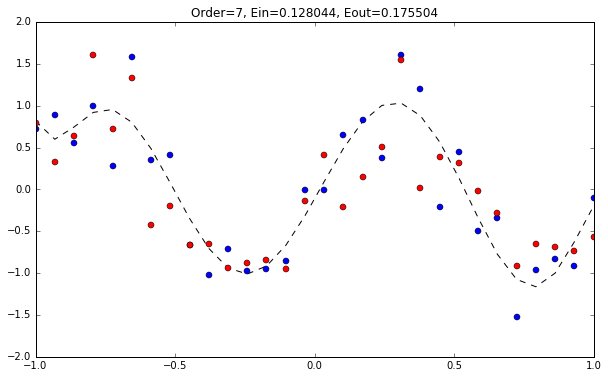

In [4]:
linear_regression(8)

## NTU EE 2016 Machine Learning hw1: PM2.5

In [5]:
data = pd.read_csv("./train.csv", sep=",")
data.columns = pd.Index(['date', 'location', 'attributes'] + list(data.columns.values)[3:])
data = data.drop('location', 1)
data.index = pd.to_datetime(data['date'])
data = data.drop('date', 1)
data.head()

,attributes,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,AMB_TEMP,14,14,14,13,12,12,12,12,15,...,22,22,21,19,17,16,15,15,15,15
2014-01-01,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2014-01-01,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
2014-01-01,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
2014-01-01,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


這裡我們只取 <font color="red">**PM2.5**</font> 的前 $9$ 個時段為 feature.

In [6]:
input_data_X = []
input_data_y = []
for day in list(set(data.index)):
    for time in xrange(15):
        tmp = data.loc[day, ['attributes'] + [str(x) for x in xrange(time, time + 9)]]
        tmp.index = tmp['attributes'].values
        tmp = tmp.drop('attributes', 1)
        tmp = tmp.convert_objects(convert_numeric=True)
        input_data_X.append(tmp)
        input_data_y.append(data.loc[data['attributes'] == 'PM2.5',\
                                     [str(time + 9)]].loc[day,].values.astype(np.float))

c:\python27\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [12]:
training_set_X = []
training_set_y = []
validating_set_X = []
validating_set_y = []
seed = np.arange(3600)
np.random.shuffle(seed)
for i in seed[:3000]:
    training_set_X.append(np.nan_to_num(input_data_X[i].loc['PM2.5', :].values))#.reshape(18 * 9)))
    #training_set_X.append(np.nan_to_num(input_data_X[i].iloc[[0, 1, 2, 3, 6, 9, 12, 13], :].values.reshape(8 * 9)))
    training_set_y.append(input_data_y[i])
for j in seed[3000:]:
    validating_set_X.append(np.nan_to_num(input_data_X[-(j + 1)].loc['PM2.5', :].values))#.reshape(18 * 9)))
    #testing_set_X.append(np.nan_to_num(input_data_X[-(j + 1)].iloc[[0, 1, 2, 3, 6, 9, 12, 13], :].values.reshape(8 * 9)))
    validating_set_y.append(input_data_y[-(j + 1)])

In [13]:
training_set_X[0: 2]

[array([ 51.,  57.,  71.,  64.,  62.,  51.,  52.,  47.,  53.]),
 array([ 52.,  53.,  39.,  17.,   9.,   6.,  12.,  16.,  15.])]

In [14]:
training_set_y[0: 2]

[array([ 59.]), array([ 16.])]

之後會繼續整理我的方法，再麻煩大家多等一會兒囉 =)